In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import os

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/jportilla/anaconda3/envs/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Code explanation:

This code defines a Convolutional Neural Network (CNN) using Keras. Here’s a breakdown of the architecture and its components:

1. models.Sequential:
	- The model is built sequentially, layer by layer.

2. **layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))**:
	- Adds a 2D convolutional layer with 32 filters, each of size 3x3.
	- activation='relu': Applies the ReLU activation function to introduce non-linearity.
	- input_shape=(28, 28, 1): Specifies the input size for grayscale images of 28x28 pixels.

3. layers.MaxPooling2D((2, 2)):
	- Reduces spatial dimensions (height and width) by a factor of 2 using max-pooling.

4. Additional Conv2D and MaxPooling2D layers:
	- Stacks more convolutional and pooling layers to learn complex features and reduce dimensionality.

6. layers.Flatten():
	- Flattens the 2D feature maps into a 1D vector, preparing the data for dense layers.

6. layers.Dense(64, activation='relu'):
	- Adds a fully connected layer with 64 neurons and ReLU activation for non-linear transformations.

7. layers.Dense(10, activation='softmax'):
	- Final output layer with 10 neurons (one for each digit in the MNIST dataset).
	- softmax: Converts the output to probabilities for multi-class classification.

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8757 - loss: 0.3910 - val_accuracy: 0.9845 - val_loss: 0.0540
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0588 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9872 - val_loss: 0.0465
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9904 - loss: 0.0290 - val_accuracy: 0.9880 - val_loss: 0.0423
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9885 - val_loss: 0.0350


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9901 - loss: 0.0334
Test accuracy: 0.9901000261306763


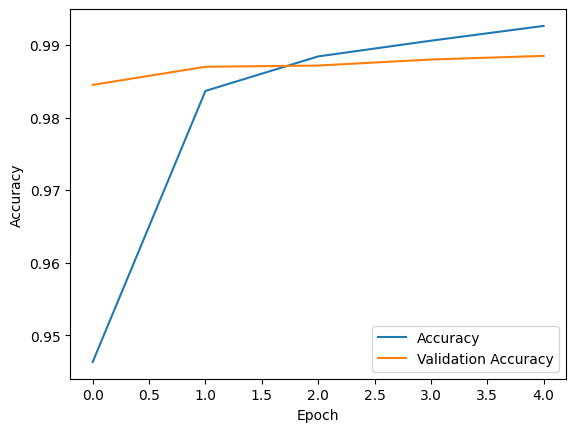

In [8]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


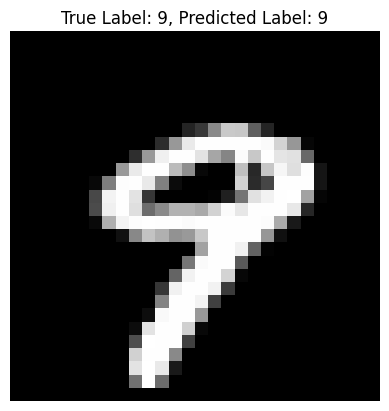

Prediction Probabilities: [[2.1078346e-08 7.6351159e-10 3.0508254e-08 1.7735256e-07 1.5140255e-05
  9.3050243e-09 2.4769631e-10 1.3532097e-04 3.0822546e-04 9.9954104e-01]]


In [13]:
import numpy as np

# Select a single image from the test set
test_image = test_images[9]
test_label = test_labels[9]

# Make predictions on the single image
predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

# Display the test image along with the predicted and true labels
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {test_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

# Print the prediction probabilities
print(f"Prediction Probabilities: {predicted_probabilities}")

In [14]:
print(f"Prediction Probabilities: {[f'{prob:.2f}' for prob in predicted_probabilities[0]]}")
    

Prediction Probabilities: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00']


In [15]:
# Function to preprocess and predict a custom image
def predict_custom_image(image_path, model):
    try:
        # Load the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28 pixels
        img_array = np.array(img).astype('float32') / 255  # Normalize pixel values
        img_array = img_array.reshape((1, 28, 28, 1))  # Reshape to match input dimensions
        
        # Make predictions
        predicted_probabilities = model.predict(img_array)
        predicted_label = np.argmax(predicted_probabilities)
        
        # Display the image and prediction
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis('off')
        plt.show()

        print(f"Prediction Probabilities: {[f'{prob:.2f}' for prob in predicted_probabilities[0]]}")
    except Exception as e:
        print(f"Error processing the image: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


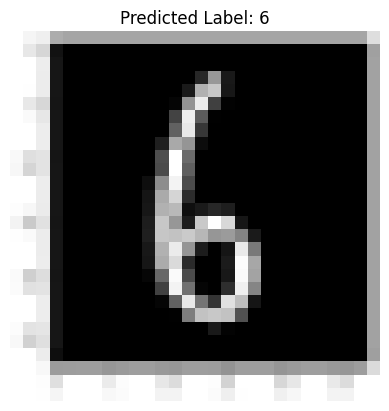

Prediction Probabilities: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00']


In [30]:
import os

# Test the function with a custom image
#three.jpeg, seven.jpeg, nine.png
custom_image_path = "/Users/jportilla/Downloads/six.png"  # Replace with your image path
if os.path.exists(custom_image_path):
    predict_custom_image(custom_image_path, model)
else:
    print("Custom image path does not exist. Please provide a valid path.")